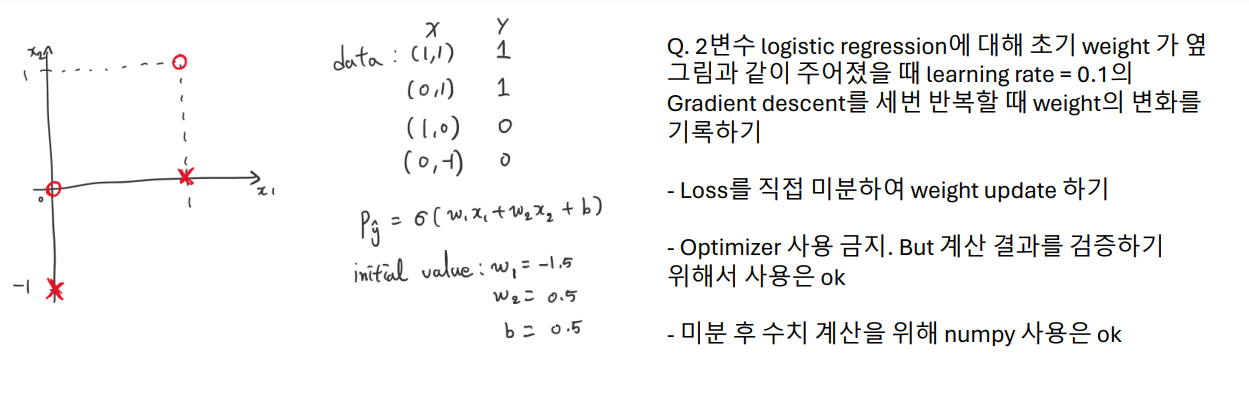

In [1]:
w1 = -1.5
w2 = 0.5
b = 0.5

In [2]:
import torch
from torch.utils.data import dataset, DataLoader
from torcheval.metrics import BinaryAccuracy
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm
import torch.optim as optim
from torcheval.metrics import MulticlassAccuracy
import torch.nn as nn

data_x = np.array([[1,1],[0,1],[1,0],[0,-1]])
data_y = np.array([1,1,0,0])

test_dataset = []



In [3]:
def cal_w1_d(data_x,data_y):
    
    sum = 0
    
    for x,y in zip(data_x,data_y):
        x1,x2 = x.squeeze()
        
        sum += x1 * (y - x1*w1 - w2*x2 - b)
    
    N = len(data_x)
    
    return -2 * sum / N

def cal_w2_d(data_x,data_y):
    
    sum = 0
    
    for x,y in zip(data_x,data_y):
        x1,x2 = x.squeeze()
        
        sum += x2 * (y.squeeze() - x1*w1 - w2*x2 - b)
    
    N = len(data_x)
    
    return -2 * sum / N

def cal_b_d(data_x,data_y):
    
    sum = 0
    
    for x,y in zip(data_x,data_y):
        x1,x2 = x.squeeze()
        
        sum += (y.squeeze() - x1*w1 - w2*x2 - b)
    
    N = len(data_x)
    
    return -2 * sum / N

In [5]:
import itertools

In [6]:
x1_point,x2_point = np.hsplit(data_x,2)
x1_space = np.linspace(-1.0,1.0,11).squeeze()
x2_space = np.linspace(-1.0,1.0,11).squeeze()
coords = list(itertools.product(x1_space, x2_space))
coords = np.array(coords)
x1_space,x2_space = np.hsplit(coords,2)

In [4]:
weight_change = []

lr = 0.1

weight_change.append({"w1":w1,"w2":w2,"b":b})

w1 = w1 - lr * cal_w1_d(data_x,data_y)
w2 = w2 - lr * cal_w2_d(data_x,data_y)
b = b - lr * cal_b_d(data_x,data_y)

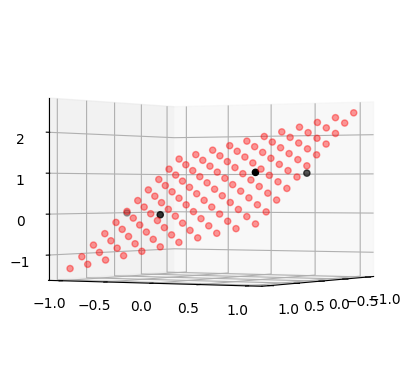

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x1_point.reshape(4),x2_point.reshape(4),data_y,c='black')
tmp_result = []
for (x1,x2) in coords:
    tmp_result.append(w1 * x1 + w2 * x2 + b)

ax.scatter(x1_space.reshape(121), x2_space.reshape(121),np.array(tmp_result).reshape(121), color='r',alpha=0.4)
ax.view_init(0, 30) 

In [11]:
print(f"w1 : {w1} \nw2 : {w2} \nb : {b}")

w1 : -1.375 
w2 : 0.56875 
b : 0.6090625000000001


In [12]:
weight_change.append({"w1":w1,"w2":w2,"b":b})

w1 = w1 - lr * cal_w1_d(data_x,data_y)
w2 = w2 - lr * cal_w2_d(data_x,data_y)
b = b - lr * cal_b_d(data_x,data_y)

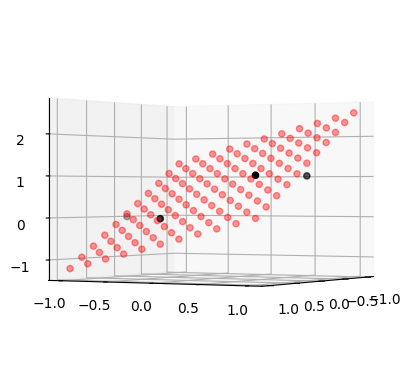

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x1_point.reshape(4),x2_point.reshape(4),data_y,c='black')
tmp_result = []
for (x1,x2) in coords:
    tmp_result.append(w1 * x1 + w2 * x2 + b)

ax.scatter(x1_space.reshape(121), x2_space.reshape(121),np.array(tmp_result).reshape(121), color='r',alpha=0.4)
ax.view_init(0, 30) 

In [14]:
print(f"w1 : {w1} \nw2 : {w2} \nb : {b}")

w1 : -1.27684375 
w2 : 0.6168265625 
b : 0.684093046875


In [15]:
weight_change.append({"w1":w1,"w2":w2,"b":b})

w1 = w1 - lr * cal_w1_d(data_x,data_y)
w2 = w2 - lr * cal_w2_d(data_x,data_y)
b = b - lr * cal_b_d(data_x,data_y)

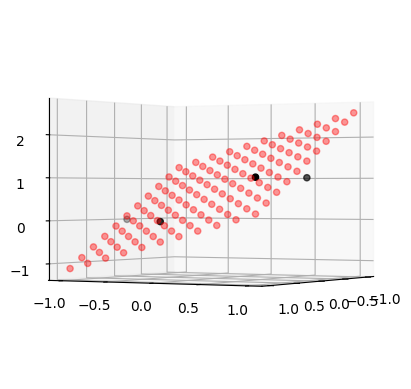

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x1_point.reshape(4),x2_point.reshape(4),data_y,c='black')
tmp_result = []
for (x1,x2) in coords:
    tmp_result.append(w1 * x1 + w2 * x2 + b)

ax.scatter(x1_space.reshape(121), x2_space.reshape(121),np.array(tmp_result).reshape(121), color='r',alpha=0.4)
ax.view_init(0, 30) 

In [17]:
print(f"w1 : {w1} \nw2 : {w2} \nb : {b}")

w1 : -1.1984100078125 
w2 : 0.650018426171875 
b : 0.7346145169726563


In [18]:
weight_change.append({"w1":w1,"w2":w2,"b":b})

In [19]:
for data in weight_change:
    print(data)

{'w1': -1.5, 'w2': 0.5, 'b': 0.5}
{'w1': -1.375, 'w2': 0.56875, 'b': 0.6090625000000001}
{'w1': -1.27684375, 'w2': 0.6168265625, 'b': 0.684093046875}
{'w1': -1.1984100078125, 'w2': 0.650018426171875, 'b': 0.7346145169726563}


In [20]:
data_x = np.array([[1,1],[0,1],[1,0],[0,-1]])
data_y = np.array([1,1,0,0])

In [21]:
w1 = torch.tensor(-1.5,requires_grad=True)
w2 = torch.tensor(0.5,requires_grad=True)
b = torch.tensor(0.5,requires_grad=True)

In [22]:
optimizer = optim.SGD([w1,w2,b],lr=0.1)

In [23]:
W1_list = []
W2_list = []
b_list = []

for epoch in range(4):
    
    x1,x2 = data_x[epoch].squeeze()
    y = data_y[epoch].squeeze()
    
    epoch_Y = w1 * x1 + w2 * x2 + b

    #loss function
    cost = torch.mean((epoch_Y - y) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    W1_list.append(w1.item())
    W2_list.append(w2.item())
    b_list.append(b.item())

print('Epoch {:4d} W1: {:.6f}, W2: {:.6f}, b: {:.6f} Cost: {:.6f}'.format(epoch, w1.item(), w2.item(), b.item(), cost.item()))

Epoch    3 W1: -1.096000, W2: 0.700800, b: 0.763200 Cost: 0.010816


In [24]:
W1_list

[-1.2000000476837158,
 -1.2000000476837158,
 -1.096000075340271,
 -1.096000075340271]

In [25]:
W2_list

[0.800000011920929, 0.6800000071525574, 0.6800000071525574, 0.7008000016212463]

In [26]:
b_list

[0.800000011920929, 0.6800000071525574, 0.784000039100647, 0.763200044631958]